In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import style
style.use('default')
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering as AggC

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
ag = AggC(3)

In [7]:
y = ag.fit_predict(X)

In [8]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
def matching(__Y, __y):
    from itertools import permutations
    __len = len(set(__Y))
    __acc = -1.
    __ans = np.arange(__len)
    
    for __name in list(permutations(set(__y), __len)):
        __name = np.array(__name)
        __t_acc = sum(__Y == __name[__y])/len(__Y)
        if __t_acc > __acc:
            __acc = __t_acc
            __ans = __name
    return __acc, __ans

In [16]:
acc, y_map = matching(Y, y)

In [18]:
y_map[y]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [20]:
for link in ["ward", "complete", "average"]:
    ag = AggC(3, linkage = link)
    y = ag.fit_predict(X)
    acc, y_map = matching(Y, y)
    print(link, "%.2f" %acc)

ward 0.89
complete 0.84
average 0.91


In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [22]:
?dendrogram

In [23]:
?linkage

In [24]:
?fcluster

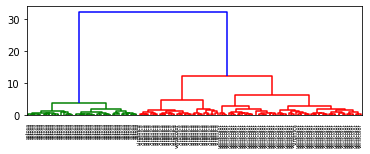

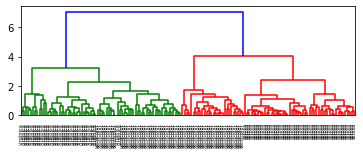

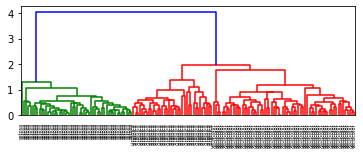

In [39]:
for meth in ["ward", "complete", "average"]:
    link = linkage(X, method=meth)
    plt.figure(figsize=(6,2))
    dendrogram(link, labels=iris.target_names[y_map[y]])
#     plt.ylim([0,0.8])
    plt.show()

In [40]:
fcluster(link, 3, criterion='distance')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

<function matplotlib.pyplot.show(*args, **kw)>

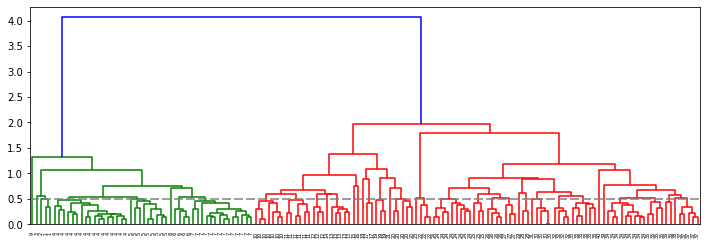

In [50]:
link = linkage(X, method=meth)
thresh = .5
label = fcluster(link, thresh, criterion='distance')

plt.figure(figsize=(12,4))
dendrogram(link, labels=label)
plt.axhline(thresh ,c = 'grey', dashes = [6, 2])
#plt.ylim([0,0.8])
plt.show    

In [51]:
df = pd.read_csv('./titanic/train.csv', index_col = 0)
df2 = pd.get_dummies(df.Sex, prefix='Sex')
df2['Pclass'] = df.Pclass
df2['SibSp'] = df.SibSp
df2['Parch'] = df.Parch
df2 = pd.concat([df2, pd.get_dummies(df.Embarked,prefix='Embarked')], axis=1)

title = pd.Series([x.split(', ')[1].split('.')[0] for x in df.Name], index=df.index)
temp = title.value_counts()
tgt = temp[temp < 3].index.values

title[[x in tgt for x in title]] = 'Etc'
df2 = pd.concat([df2, pd.get_dummies(title, prefix='Embarked')], axis=1)

In [63]:
df2

,Sex_female,Sex_male,Pclass,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Embarked_Dr,Embarked_Etc,Embarked_Master,Embarked_Miss,Embarked_Mr,Embarked_Mrs,Embarked_Rev
PassengerId,,,,,,,,,,,,,,,
1,0,1,3,1,0,0,0,1,0,0,0,0,1,0,0
2,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
3,1,0,3,0,0,0,0,1,0,0,0,1,0,0,0
4,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0
5,0,1,3,0,0,0,0,1,0,0,0,0,1,0,0
6,0,1,3,0,0,0,1,0,0,0,0,0,1,0,0
7,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
8,0,1,3,3,1,0,0,1,0,0,1,0,0,0,0
9,1,0,3,0,2,0,0,1,0,0,0,0,0,1,0


In [52]:
X = df2.values
Y = df.Survived.values

In [61]:
for link in ["ward", "complete", "average"]:
    ag = AggC(2, linkage = link)
    y = ag.fit_predict(X)
    acc, y_map = matching(Y, y)
    print(link, "%.6f" %acc)

ward 0.576880
complete 0.608305
average 0.608305


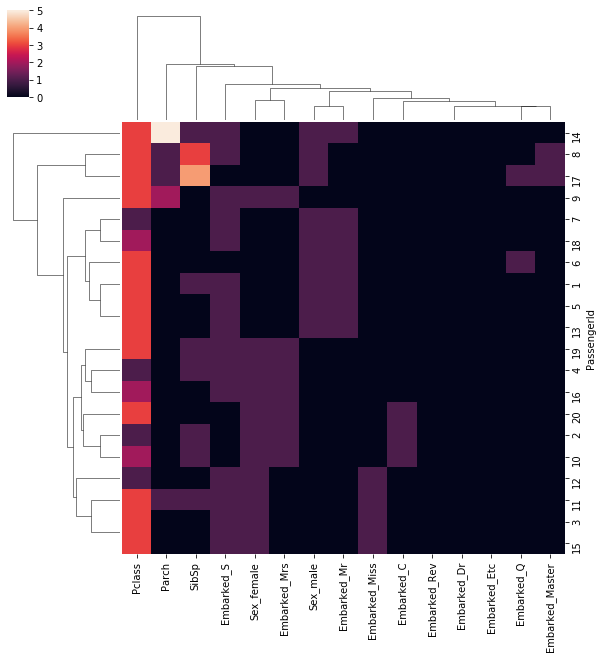

In [62]:
sns.clustermap(df2.loc[:20, :])